# Lecture 16 Part 1 - Cluster Validity Metrics & Non-Parametric Classification with K-Nearest Neighbors

---

# Cluster Validity Metrics

How would you evaluate clustering results? - **Cluster Validity Indices**
    
* Cluster validity indices are used for a number of different goals. For example, cluster validity metrics can be used to compare clustering results, try to determine the *correct* number of clusters, try to select the *correct* parameter settings, try to evaluate the appropriateness of the clustering result based on the data only (and not using another result or "ground truth" data).
    
In general, there are three types of **index criteria** to perform cluster validity:

1. **Internal criteria.** We evaluate the results of a clustering algorithm in terms of quantities that involve the vectors of the data set themselves. 
2. **External criteria.** We evaluate the results of a clustering algorithm based on a pre-specified structure, which is imposed on a data set and reflects our intuition about the clustering structure of the data set.
3. **Relative criteria.** We evaluate the results of a clustering structure by comparing it to other clustering schemes, resulting by the same algorithm but with different parameter values. In practice, relative criteria are a combination on internal and external criteria.

## Internal Criteria 

As the goal of clustering is to make objects within the same cluster similar and objects in different clusters distinct, internal cluster validity measures are defined by combining compactness and separability.

The optimal clustering scheme under the internal criteria index includes:

* Compactness (or intra-distance or within-cluster scatter): The members of each cluster should be as close to each other as possible. A common measure of compactness is the variance, which should be minimized.
* Separation (or inter-distance or between-cluster scatter): This indicates how distinct two clusters are. It computes the distance between two different clusters. There are three common approaches measuring the distance between two different clusters:
    * Single linkage: It measures the distance between the closest members of the clusters. 
    * Complete linkage: It measures the distance between the most distant members. 
    * Comparison of centroids: It measures the distance between the centers of the clusters. 

### Example: Silhouette Index

The Silhoute Index is an internal cluster validity index that is used to judge the quality of any clustering solution. 

Given a set of data points $X=\{x_1,\dots,x_N\}$ and a partition of $X$ (i.e. clustering result). Let's define the following:
* $a_i$ is the average distance of the point $x_i$ to all the other points of the cluster in which $x_i$ is assigned to
* $b_i$ is the average distance of the point $x_i$ to all the other points of in the other clusters. 

For every data point $x_i \in X$, the Silhouette Index is defined as:

$$s = \frac{1}{N} \sum_{i=1}^N \frac{b_i-a_i}{\max(a_i,b_i)}$$

* Silhouette index is the average silhouette of all data points and it reflects the compactness and separation of clusters.

* The value of silhouette index varies from -1 and 1 and higher indicates better clustering results.

There are many other internal cluster validity indices!

## External Criteria

External cluster validity indices are used to measure how well a clustering result matches a set of *give* labels. 
External cluster validity indices can be used to:
* compare the clustering results with the *ground truth* (true labels),
* compare clustering results between different clustering algorithms to measure how different they are and how stable a particular clustering is on a data set across parameter settings and/or algorithms.

### Example: Rand Index

The Rand Index is an external cluster validity index that is used to compare clustering results obtained from different parameter settings or algorithms. 

Given a set of data points $X$ and two partitions (i.e. clustering results) of $X$ to compare. One partition $C=\{C_1, \dots,C_k\}$, that partitions $X$ into $k$ clusters, and another partition $D=\{D_1,\dots,D_s\}$, that partitions $X$ into $s$ clusters. Let's define the following:

* $a$ is the number of pairs of elements in $X$ that are in the same subset in $C$ and in the same subset in $D$.
* $b$ is the number of pairs of elements in $X$ that are in different subset in $C$ and in different subset in $D$.
* $c$ is the number of pairs of elements in $X$ that are in the same subset in $C$ and in different subset in $D$.
* $d$ is the number of pairs of elements in $X$ that are in different subset in $C$ and in the same subset in $D$.

The Rand Index is defined as:

$$r = \frac{a+b}{a+b+c+d}$$

* Intuitively, $a+b$ can be considered as the number of *agreements* between $C$ and $D$, and $c+d$ as the number of *disagreements* between $C$ and $D$.

* The value of rand index varies from 0 and 1 and higher indicates higher consistency between partitions $C$ and $D$.

There are many other external cluster validity indices!

---

## K-Nearest Neighbors (or KNN)

1. It is a supervised learning algorithm.

2. It is a non-parametric classifier
    * KNN belongs to a subcategory of nonparametric models that is described as **instance-based learning**. Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process.

3. It is known as a *lazy learner*. It is called lazy not because of its apparent simplicity, but because it doesn't learn a discriminative function from the training data, but memorizes the training dataset instead.
    * Nearest neighbors methods compare a test point to the $K$ nearest training data points and then estimate an output value based on the desired/true output values of the $K$ nearest training points.

4. Essentially, there is no "training" other than storing the training data points and their desired outputs.

## Pseudo-Code for KNN

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps: 
1. Choose the number of neighbors, $K$, and a distance metric. 

2. Find the $K$ nearest neighbors of the sample that we want to classify. 

3. Assign the class label by majority vote.

Based on the chosen distance metric, the KNN algorithm finds the $K$ samples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the new data point is then determined by a majority vote among its $K$ nearest neighbors.

* If there are ties, they can be broken randomly or using schemes like applying the label to the closest data point in the neighborhood.

## Advantages & Challenges

The main advantage of such a memory-based approach is that the classifier immediately **adapts as we collect new training data**. 

However, the downside is that the **computational complexity** for classifying new samples grows linearly with the number of samples in the training dataset in the worst-case scenario - unless the dataset has very few dimensions (features) and the algorithm has been implemented using efficient data structures such as **K-D trees**. 

* For more information about K-D trees, refer to the following work: Friedman, J. H., Bentley, J. L., & Finkel, R. A. (1977). An algorithm for finding best matches in logarithmic expected time. ACM Transactions on Mathematical Software (TOMS), 3(3), 209-226.

Furthermore, we can't discard training samples since no training step is involved. Thus, **storage space** can become a challenge if we are working with large datasets.

### Observations

* The *right* choice of $K$ is crucial to find a good balance between overfitting and underfitting. We can find the best value for $K$ using experimental design with **cross-validation**.

* We also have to make sure that we choose a **distance metric** that is appropriate for the features in the dataset. Often, a simple Euclidean distance measure is used for real-value samples. However, if we are using a Euclidean distance measure, it is also important to **standardize the data** so that each feature contributes equally to the distance.

* It is important to mention that KNN is very susceptible to overfitting due to the **curse of dimensionality**. Intuitively, we can think of even the closest neighbors being too far away in a high-dimensional space to give a good estimate. 

* We have discussed the concept of **regularization** as one way to avoid overfitting. However, in models where regularization is not applicable (non-parametric), such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us avoid the curse of dimensionality.

## Distance Metrics
    
In order to find the $k$ *nearest-neighbors* in the training data, you need to define a **similarity measure** or a **dissimilarity measure**. The most common dissimilarity measure is Euclidean distrance:

* Euclidean distance: $d_E(\mathbf{x}_1, \mathbf{x}_2) = \Vert\mathbf{x}_1-\mathbf{x}_2\Vert_2 = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T(\mathbf{x}_1 - \mathbf{x}_2)}$

* City-block distance: $d_{CB}(\mathbf{x}_1,\mathbf{x}_2) = \sum_{i=1}^n |\mathbf{x}_{1i} - \mathbf{x}_{2i}|$

* Mahalanobis distance: $d_M(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T\Sigma^{-1}(\mathbf{x}_1 - \mathbf{x}_2)}$

* Cosine distance: $d_{cos}(\mathbf{x}_1, \mathbf{x}_2) = 1 - \cos(\angle(x_1,x_2)) = 1 - \frac{\mathbf{x}_1^T \mathbf{x}_2}{\Vert\mathbf{x}_1\Vert_2 \Vert\mathbf{x}_2\Vert_2}$

* and many more.

___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

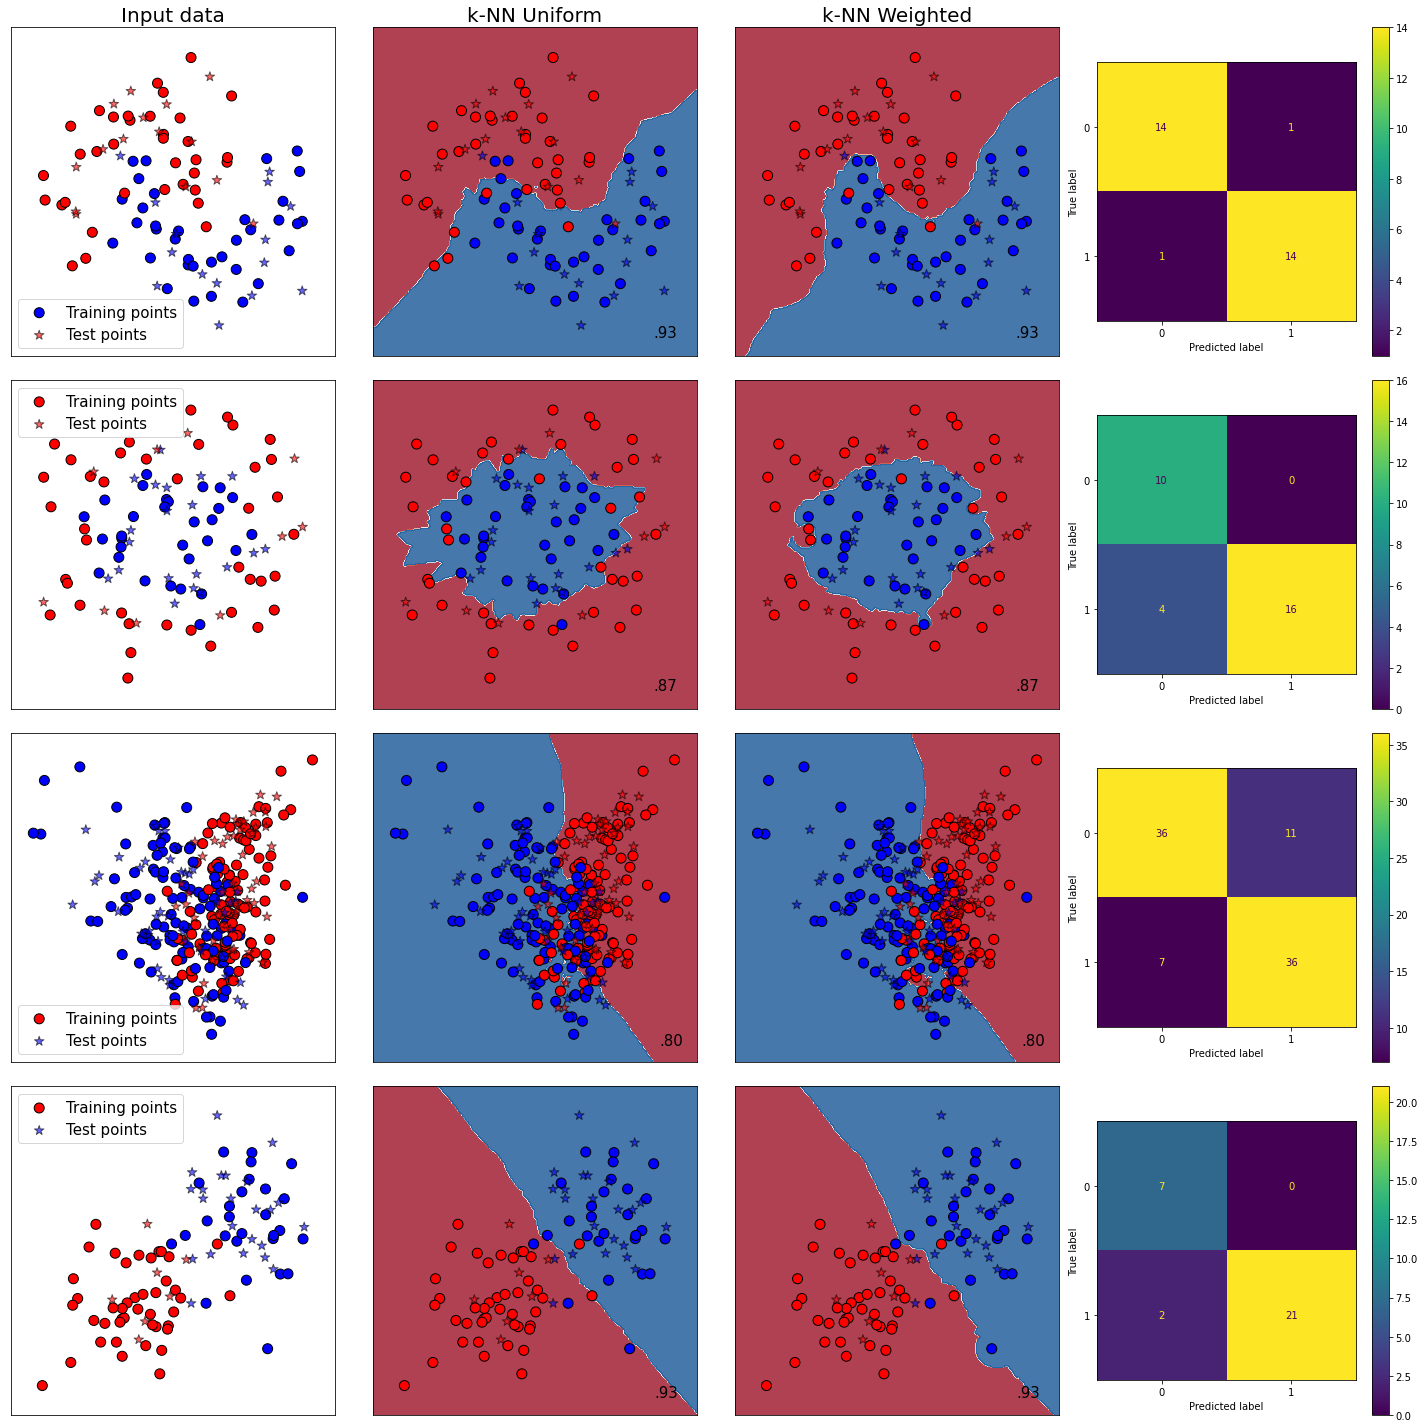

In [4]:
# Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 20))

# set up classifiers
n_neighbors = 15
classifiers = [KNeighborsClassifier(n_neighbors, weights='uniform'), \
               KNeighborsClassifier(n_neighbors, weights='distance')]
names = ['k-NN Uniform', 'k-NN Weighted']

# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable,
            make_blobs(centers=[[-1,-1],[2,1]])]
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title('Input data',size=20)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=100,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='*', s=100, c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(fontsize=15)
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        #Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=100,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='*', c=y_test, cmap=cm_bright, s=100,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1
    # Confusion Matrix
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=ax)
    i += 1    

plt.tight_layout()
plt.show()

## Discussions

1. What happens when there are imbalanced classes?

2. Is k-NN sensitive to data scaling?

___